# Load Data set and import package 

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict


In [39]:
dataset=pd.read_csv('train.csv')
dataset.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Description of the dataset

In [40]:
dataset.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [41]:
dataset.shape

(42000, 785)

## **Is there any missing values in dataset ?**


In [42]:
dataset.isna().any().sum()

0

In [43]:
dataset['label'].unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6], dtype=int64)

# Determine X as pixels and Y as Lable

In [44]:
X=dataset.iloc[:,1:]
Y=dataset.iloc[:,0]

# Split Data 

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

# I Try to Apply ``Binary`` Model That Only Predict Bigit **3**

In [46]:
y_train_3 = (Y_train == 3)
y_test_3 = (Y_test == 3)


# Evaluate Some Algorithms With Confusion Matrix

### Use ``Decision Tree`` Model

Confusion Matrix for Decision Tree
 [[7348  179]
 [ 163  710]]


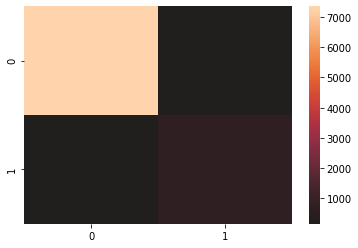

In [47]:
DTmodels=DecisionTreeClassifier()
DTmodels.fit(X_train,y_train_3)
Y_predict=DTmodels.predict(X_test)
CM_DT=confusion_matrix(y_test_3, Y_predict)
print("Confusion Matrix for Decision Tree\n",CM_DT)
sns.heatmap(CM_DT, center = True)
plt.show()


### Use ``KNN`` Model

Confusion Matrix for KNeighbors
 [[7505   22]
 [  39  834]]


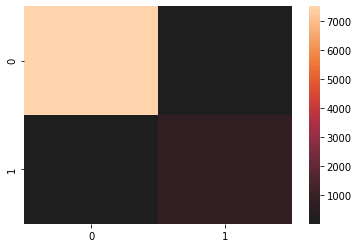

In [48]:
KNNmodels=KNeighborsClassifier()
KNNmodels.fit(X_train,y_train_3)
""" models.append(('KNN' ,KNeighborsClassifier()))
models.append(('LR',LogisticRegression())) """

Y_predict=KNNmodels.predict(X_test)
CM_KNN=confusion_matrix(y_test_3, Y_predict)
print("Confusion Matrix for KNeighbors\n",CM_KNN)
sns.heatmap(CM_KNN, center = True)
plt.show()

### Use ``Logistic Regression`` Model 

Confusion Matrix for Logistic Regression
 [[7412  115]
 [ 146  727]]


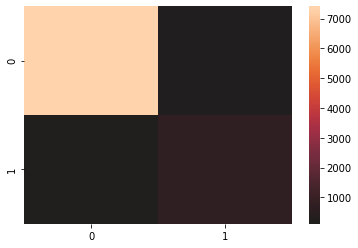

In [49]:
LRmodels=LogisticRegression()
LRmodels.fit(X_train,y_train_3)
Y_predict=LRmodels.predict(X_test)
CM_LR=confusion_matrix(y_test_3, Y_predict)
print("Confusion Matrix for Logistic Regression\n",CM_LR)
sns.heatmap(CM_LR, center = True)
plt.show()

### Use ``SVC`` Model

Confusion Matrix for SVC
 [[7515   12]
 [  59  814]]


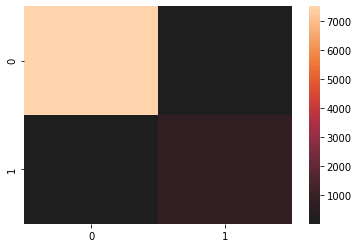

In [50]:
SVCmodels=SVC()
SVCmodels.fit(X_train,y_train_3)
Y_predict=SVCmodels.predict(X_test)
CM_SVC=confusion_matrix(y_test_3, Y_predict)
print("Confusion Matrix for SVC\n",CM_SVC)
sns.heatmap(CM_SVC, center = True)
plt.show()

> ### Depend on Confusion Matrix for Four Models Decision Tree , KNN , Logistic Regression , SVC
### ``KNN``  and ``SVC`` is Close together

## I Try to change model_selection from ``train_test_split`` to ``cross_val_predict`` to compare Confusion matrix 

In [51]:
y_pred = cross_val_predict( SVC(),X_train, y_train_3, cv=10)
conf_mat = confusion_matrix(y_train_3, y_pred)

### This Method Takes A lot of Time During Run 

Confusion Matrix for SVC
 [[30076    46]
 [  224  3254]]


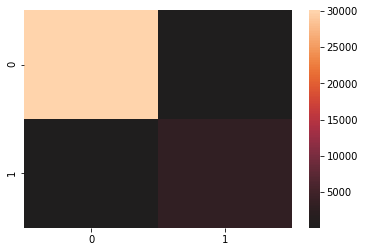

In [52]:
print("Confusion Matrix for SVC\n",conf_mat)
sns.heatmap(conf_mat, center = True)
plt.show()

## Using the ``KNN`` classifier to classify the 10 digits

Confusion Matrix for KNeighbors
 [[847   0   1   0   0   2   2   1   0   0]
 [  0 937   1   0   0   0   1   1   0   0]
 [  3  14 796   0   0   0   1  16   4   1]
 [  2   3   7 838   0  14   0   3   3   3]
 [  0   4   0   0 806   0   0   1   0  18]
 [  2   2   1  12   0 704   8   0   0   2]
 [  2   0   0   0   2   4 792   0   0   0]
 [  0  10   3   0   1   0   0 827   0   9]
 [  4  19   1  15   4  16   6   3 772   6]
 [  4   1   0   6   5   1   0  20   1 805]]


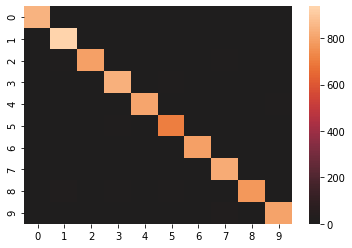

In [55]:
KNNmodels=KNeighborsClassifier()
KNNmodels.fit(X_train,Y_train)
Y_predict=KNNmodels.predict(X_test)
CM_KNN=confusion_matrix(Y_test, Y_predict)
print("Confusion Matrix for KNeighbors\n",CM_KNN)
sns.heatmap(CM_KNN, center = True)
plt.show()

## Using the ``SVC`` classifier to classify the 10 digits

Confusion Matrix for SVC
 [[847   0   0   0   1   2   3   0   0   0]
 [  0 934   1   3   0   0   0   0   2   0]
 [  1   1 817   1   2   0   2   5   5   1]
 [  1   0   8 841   0  11   0   4   5   3]
 [  0   1   2   0 813   0   1   4   0   8]
 [  2   1   0  10   0 712   3   0   1   2]
 [  3   0   1   0   4   3 789   0   0   0]
 [  0   3   4   0   3   0   0 830   0  10]
 [  1   5   0   2   4   5   3   1 822   3]
 [  4   1   1   3  11   2   0   8   2 811]]


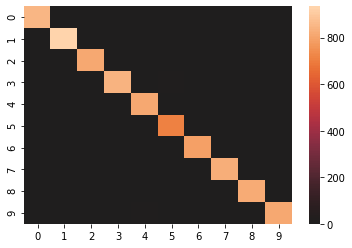

In [56]:
SVCmodels=SVC()
SVCmodels.fit(X_train,Y_train)
Y_predict=SVCmodels.predict(X_test)
CM_SVC=confusion_matrix(Y_test, Y_predict)
print("Confusion Matrix for SVC\n",CM_SVC)
sns.heatmap(CM_SVC, center = True)
plt.show()